In [3]:
# install.packages("tidyverse")
library(tidyverse)
library(jsonlite)



Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




In [4]:
data.file <- "data.json"
data.url <- "https://ods.railway.gov.tw/tra-ods-web/ods/download/dataResource/8ae4cabf6973990e0169947ed32454b9"
download.file(url = data.url, destfile = data.file)

In [74]:
data <- fromJSON(data.file) %>% filter(staCode == "1210", str_sub(trnOpDate, -2) == "01")
data$trnOpDate <- as.Date(data$trnOpDate, format = "%Y%m%d")
data$gateInComingCnt <- as.numeric(data$gateInComingCnt)
data$gateOutGoingCnt <- as.numeric(data$gateOutGoingCnt)

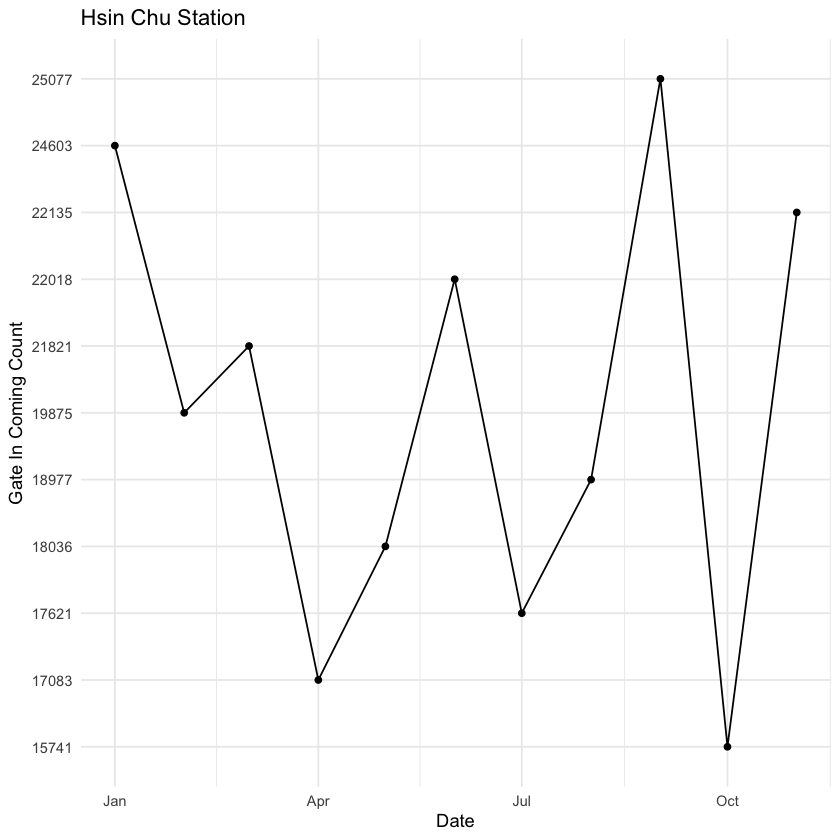

In [54]:
ggplot(data, aes(x = trnOpDate, y = gateInComingCnt, group = 1)) +
    geom_line() +
    geom_point() +
    labs(title = "Hsin Chu Station", x = "Date", y = "Gate In Coming Count") +
    theme_minimal()

In [ ]:
df <- data.frame(
    Month = integer(),
    Incoming_changes = numeric(),
    Outgoing_changes = numeric()
)

In [98]:
for(i in 2:nrow(data)) {
    new_row = data.frame(
        Month = as.integer(format(data[i, "trnOpDate"], "%m")),
        Incoming_changes = data[i, "gateInComingCnt"] - data[i - 1, "gateInComingCnt"],
        Outgoing_changes = data[i, "gateOutGoingCnt"] - data[i - 1, "gateOutGoingCnt"]
    )
    df <- rbind(df, new_row)
}

In [99]:
df

Month,Incoming_changes,Outgoing_changes
<int>,<dbl>,<dbl>
2,-4728,-6249
3,1946,-953
4,-4738,-2658
5,953,107
6,3982,3666
7,-4397,-3023
8,1356,420
9,6100,9030
10,-9336,-12001
